# Question 1 below (10 points)¶
Make a new jupyter notebook called lab7_submission.ipynb and complete the following tasks:

Download daily values (i.e. service='dv') for another station and time period of your choosing.
Plot one column
In a markdown cell below, describe what your plot shows. 
A map of station ID numbers can be found here: https://maps.waterdata.usgs.gov/mapper/index.html

A table of the parameter codes can be found here: https://help.waterdata.usgs.gov/parameter_cd?group_cd=PHY

In [1]:
# Import packages
import numpy as np
import pandas as pd
import folium

In [2]:
# Install package for obtaining USGS streamflow data
!pip install -U dataretrieval

In [3]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '14166500'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2015-08-01', end='2016-07-30')
df

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2015-08-01 00:00:00+00:00,8.65,A,14166500
2015-08-02 00:00:00+00:00,8.37,A,14166500
2015-08-03 00:00:00+00:00,10.90,A,14166500
2015-08-04 00:00:00+00:00,10.60,A,14166500
2015-08-05 00:00:00+00:00,9.10,A,14166500
...,...,...,...
2016-07-26 00:00:00+00:00,23.20,A,14166500
2016-07-27 00:00:00+00:00,22.20,A,14166500
2016-07-28 00:00:00+00:00,21.20,A,14166500


In [4]:
df['00060_Mean'].describe()

count     365.000000
mean      241.480356
std       380.253900
min         3.710000
25%        22.200000
50%        69.300000
75%       300.000000
max      3670.000000
Name: 00060_Mean, dtype: float64

<AxesSubplot:xlabel='datetime'>

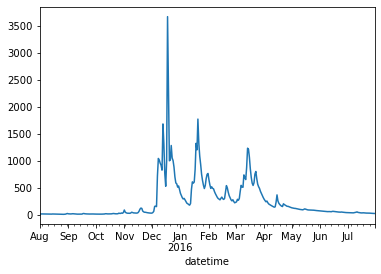

In [5]:
# Simple plot
df['00060_Mean'].plot()

Our plot shows the total volume of water discharge at this gage point (Long Tom River, OR) for the year 2010 to 2011

# Question 2 below (10 points)
Make an HTML table that contains the site name, site number and mean daily discharge between Oct 31, 2020 and Sep 30, 2021 (zero decimal places)** for three rivers in the US.
HINT: the discharge parameter is 00060_Mean. If the data from your site does not contain this column, try another site.

In [6]:
salmon_river = '13307000'
yukon_river = '15565447'
mississippi_river = '07374000'

#rivers = [columbia_river, yukon_river, mississippi_river]
#df = nwis.get_record(sites = rivers, service = 'dv', start = '2020-10-31', end = '2021-09-30')




In [7]:
sr_df = nwis.get_record(sites = salmon_river, service = 'dv', start = '2020-10-31', end = '2021-09-30')
yr_df = nwis.get_record(sites = yukon_river, service = 'dv', start = '2020-10-31', end = '2021-09-30')
mr_df = nwis.get_record(sites = mississippi_river, service = 'dv', start = '2020-10-31', end = '2021-09-30')

sr_yr_mean = sr_df['00060_Mean'].mean()
yr_yr_mean = yr_df['00060_Mean'].mean()
mr_yr_mean = mr_df['00060_Mean'].mean()

print(sr_yr_mean, yr_yr_mean, mr_yr_mean)


1734.5253731343284 257725.37313432837 596964.0718562874


<table>
    <tr>
        <td>River Name</td>
        <td>Site Number</td>
        <td>Mean Discharge (cubic feet per second)</td>
    </tr>
    <tr>
        <td>Salmon River</td>
        <td>13307000</td>
        <td>1734</td>
    </tr>
    <tr>
        <td>Yukon River</td>
        <td>15565447</td>
        <td>257725</td>
    </tr>
    <tr>
        <td>Mississippi River</td>
        <td>07374000</td>
        <td>596964</td>
    </tr>
</table>




Here is our table of three different locations and the 00060 mean value

In [8]:
# Read HTML table data
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
mountains

[                                                   0
 0  Map this section's coordinates using: OpenStre...
 1                       Download coordinates as: KML,
     Rank                           Mountain peak        Mountain range  \
 0      1               Mount Hood[6][7][8][9][a]         Cascade Range   
 1      2      Mount Jefferson[10][11][12][13][b]         Cascade Range   
 2      3            South Sister[14][15][16][17]         Cascade Range   
 3      4         North Sister[18][19][20][21][c]         Cascade Range   
 4      5        Middle Sister[22][23][24][25][d]         Cascade Range   
 5      6        Sacajawea Peak[26][27][28][e][f]     Wallowa Mountains   
 6      7          Steens Mountain[29][30][31][g]       Steens Mountain   
 7      8        Aneroid Mountain[32][33][34][35]     Wallowa Mountains   
 8      9               Twin Peaks[36][37][38][h]     Wallowa Mountains   
 9     10            Red Mountain[39][40][41][42]     Wallowa Mountains   
 10    11  M

In [9]:
# Print number of tables on webpage
len(mountains)

13

In [10]:
# We would like the table that contains the highest summits of Oregon which happens to be the second one
mountain_stats = mountains[1]

In [11]:
# Some wrangling
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)

In [12]:
mountain_stats

,Rank,Mountain peak,Mountain range,Elevation,Prominence,Isolation,Location
0,1,Mount Hood[6][7][8][9][a],Cascade Range,3428.8 m,2349 m,92.2 km,45°22′25″N 121°41′45″W﻿ / ﻿45.3735°N 121.6959°W
1,2,Mount Jefferson[10][11][12][13][b],Cascade Range,3201 m,1767 m,77.5 km,44°40′27″N 121°47′59″W﻿ / ﻿44.6743°N 121.7996°W
2,3,South Sister[14][15][16][17],Cascade Range,3158.5 m,1705 m,63.4 km,44°06′13″N 121°46′09″W﻿ / ﻿44.1035°N 121.7693°W
3,4,North Sister[18][19][20][21][c],Cascade Range,3075 m,837 m,7 km,44°10′00″N 121°46′20″W﻿ / ﻿44.1666°N 121.7723°W
4,5,Middle Sister[22][23][24][25][d],Cascade Range,3064 m,382 m,1.8 km,44°08′54″N 121°47′02″W﻿ / ﻿44.1483°N 121.7840°W
5,6,Sacajawea Peak[26][27][28][e][f],Wallowa Mountains,3000 m,1949 m,202 km,45°14′42″N 117°17′34″W﻿ / ﻿45.2450°N 117.2929°W
6,7,Steens Mountain[29][30][31][g],Steens Mountain,2968 m,1336 m,201 km,42°38′11″N 118°34′36″W﻿ / ﻿42.6364°N 118.5767°W
7,8,Aneroid Mountain[32][33][34][35],Wallowa Mountains,2958.7 m,647 m,9.48 km,45°12′11″N 117°10′30″W﻿ / ﻿45.2030°N 117.1750°W
8,9,Twin Peaks[36][37][38][h],Wallowa Mountains,2950 m,610 m,7.79 km,45°18′17″N 117°20′43″W﻿ / ﻿45.3046°N 117.3452°W
9,10,Red Mountain[39][40][41][42],Wallowa Mountains,2913.8 m,610 m,11.84 km,45°03′52″N 117°14′46″W﻿ / ﻿45.0644°N 117.2460°W


In [13]:
mountain_stats.dtypes

Rank               int64
Mountain peak     object
Mountain range    object
Elevation         object
Prominence        object
Isolation         object
Location          object
dtype: object

In [14]:
# Have a look at the location object
mountain_stats['Location'].iloc[0]

'45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W'

In [15]:
# The latitude is string position 27 to 34
lat1 = mountain_stats['Location'].iloc[0][27:34]

# The longitude is string position 37 to 45
lon1 = mountain_stats['Location'].iloc[0][37:45]

In [16]:
# Convert to float and multiple by -1
float(mountain_stats['Location'].iloc[0][37:45]) * -1

-121.6959

In [17]:
# To get these data from every row, we can write a quick for loop
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))
coords

[(45.3735, -121.6959),
 (44.6743, -121.7996),
 (44.1035, -121.7693),
 (44.1666, -121.7723),
 (44.1483, -121.784),
 (45.245, -117.2929),
 (42.6364, -118.5767),
 (45.203, -117.175),
 (45.3046, -117.3452),
 (45.0644, -117.246),
 (42.4445, -122.3156),
 (45.2223, -117.3968),
 (43.1528, -122.0665),
 (44.083, -121.6994),
 (44.8168, -118.1039),
 (43.9794, -121.6885),
 (44.3123, -118.7166),
 (42.9229, -122.0162),
 (43.5207, -122.1496),
 (42.0995, -118.6506),
 (42.0628, -120.2408),
 (42.3001, -120.1238),
 (43.1551, -122.22),
 (42.496, -120.8773),
 (42.3155, -122.0876),
 (42.9306, -121.3607),
 (44.7138, -118.5617),
 (42.5134, -122.1453),
 (44.2889, -118.4954),
 (42.4597, -119.7414),
 (43.6892, -121.2549)]

In [18]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i]).add_to(map)
map

---------------
## Question 3 below (10 points)

* Make a new map of the tallest mountains in Oregon but include a popup that displays the `Isolation` data as a **float**.

--------------

In [19]:
# Get elevation value as a float
float(mountain_stats['Isolation'].iloc[0][:-2])

92.2

In [20]:
# To get these data from every row, we can write another quick for loop
isolation = []
for i in range(len(mountain_stats)):
    iso = float(mountain_stats['Isolation'].iloc[i][:-2])
    isolation.append(iso)
isolation

[92.2,
 77.5,
 63.4,
 7.0,
 1.8,
 202.0,
 201.0,
 9.48,
 7.79,
 11.84,
 111.8,
 5.32,
 81.1,
 5.52,
 69.9,
 11.02,
 74.2,
 25.9,
 41.4,
 45.5,
 71.4,
 28.1,
 12.49,
 65.7,
 23.7,
 53.1,
 23.5,
 15.98,
 10.73,
 35.6,
 46.5]

In [21]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=isolation[i]).add_to(map)
map

Here is our plotted map with the isolation pop up data as a float

In [22]:
# Install webdriver_manager: https://github.com/SergeyPirogov/webdriver_manager
!pip3 install webdriver_manager

In [23]:
# Import packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

In [24]:
# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open a web browser at the following page
driver.get("https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon")



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\zenon\.wdm\drivers\chromedriver\win32\98.0.4758.102]


In [25]:
# Retrieve ski resort names
html_list = driver.find_element(By.ID, "mw-pages")
items = html_list.find_elements(By.TAG_NAME, "li")

In [26]:
ski_resort_names = []
for item in items:
    text = item.text
    print(text)
    ski_resort_names.append(text)
driver.close()

Anthony Lakes (ski area)
Mount Ashland Ski Area
Cooper Spur ski area
Ferguson Ridge Ski Area
Hoodoo (ski area)
Mount Ashland Ski Area Expansion
Mount Bachelor ski area
Mount Hood Meadows
Mount Hood Skibowl
Snow Bunny
Spout Springs Ski Area
Summit Pass (Oregon)
Timberline Lodge ski area
Warner Canyon
Willamette Pass Resort


In [35]:
# Define test URL
url = 'https://www.google.com/maps/place/Hoodoo+Ski+Area+Oregon/'

# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open URL
driver.get(url)



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\zenon\.wdm\drivers\chromedriver\win32\98.0.4758.102]


In [36]:
# Click search
element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
element.click()

In [37]:
# Retrieve the URL
link = driver.current_url

# We can find the first occurrence of a character by using the "find" method
link.find('@')

50

In [38]:
split1 = link.rsplit('@', 1)
split1

['https://www.google.com/maps/place/Hoodoo+Ski+Area/',
 '44.4086436,-121.8801706,15z/data=!3m1!4b1!4m5!3m4!1s0x54bf374c3f8e7d9d:0x28cc775b14baa46b!8m2!3d44.4086439!4d-121.8714158']

In [39]:
split2 = split1[1].rsplit(',', 1)
split2

['44.4086436,-121.8801706',
 '15z/data=!3m1!4b1!4m5!3m4!1s0x54bf374c3f8e7d9d:0x28cc775b14baa46b!8m2!3d44.4086439!4d-121.8714158']

In [40]:
split3 = split2[1].rsplit(',', 1)
split3

['15z/data=!3m1!4b1!4m5!3m4!1s0x54bf374c3f8e7d9d:0x28cc775b14baa46b!8m2!3d44.4086439!4d-121.8714158']

In [41]:
# Here's the "one-liner"
lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)

In [42]:
lat, lon

('44.4086436', '-121.8801706')

In [43]:
driver.close()

In [44]:
import time

ski_resort_coords = []

# Loop through every ski resort to find it's coordinates
for resort in ski_resort_names:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + resort + ' Oregon/'
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    time.sleep(2)
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    ski_resort_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\zenon\.wdm\drivers\chromedriver\win32\98.0.4758.102]


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\zenon\.wdm\drivers\chromedriver\win32\98.0.4758.102]


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\zenon\.wdm\d

In [45]:
ski_resort_coords

[('44.9629232', '-118.242279'),
 ('42.0816847', '-122.7135088'),
 ('45.4188448', '-121.6152073'),
 ('45.2816848', '-117.1213966'),
 ('44.4086436', '-121.8801706'),
 ('42.0816847', '-122.7135088'),
 ('44.0028934', '-121.6878262'),
 ('45.3317549', '-121.6739396'),
 ('45.2943301', '-121.8071358'),
 ('45.2871415', '-121.7377963'),
 ('45.7552422', '-118.0601758'),
 ('43.9605367', '-125.7339427'),
 ('45.3311278', '-121.7197612'),
 ('42.2373737', '-120.3033932'),
 ('43.6000537', '-122.0452948')]

In [46]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(ski_resort_coords)):
    folium.Marker(ski_resort_coords[i], popup=ski_resort_names[i]).add_to(map)
map

---------------
## Question 4 below (10 points)

* Write a script to automatically derive the geographic coordinates for the following addresses:

    * 1844 SW Morrison St, Portland, OR 97205
    
    * 800 Occidental Ave S, Seattle, WA 98134
    
    * 1001 Stadium Dr, Inglewood, CA 90301
    
    * 2700 Martin Luther King Jr Blvd, Eugene, OR 97401
    

You can **either** find each one individually **or** make a list of the addresses and use a for loop. 


* Plot the coordinates of these addresses on an interactive map using `folium` 



--------------

In [47]:
address_list = ['1844 SW Morrison St, Portland, OR 97205','800 Occidental Ave S, Seattle, WA 98134','1001 Stadium Dr, Inglewood, CA 90301','2700 Martin Luther King Jr Blvd, Eugene, OR 97401']

address_list

['1844 SW Morrison St, Portland, OR 97205',
 '800 Occidental Ave S, Seattle, WA 98134',
 '1001 Stadium Dr, Inglewood, CA 90301',
 '2700 Martin Luther King Jr Blvd, Eugene, OR 97401']

In [48]:
import time

address_coords = []

# Loop through every ski resort to find it's coordinates
for address in address_list:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + address
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    time.sleep(2)
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    address_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\zenon\.wdm\drivers\chromedriver\win32\98.0.4758.102]


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\zenon\.wdm\drivers\chromedriver\win32\98.0.4758.102]


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\zenon\.wdm\d

In [49]:
map = folium.Map(location=[44, -121], zoom_start=4)
for i in range(0, len(address_coords)):
    folium.Marker(address_coords[i], popup=address_list[i]).add_to(map)
map

here is our map of the suggested addresses for question four. 

---------------
## Question 5 below (10 points)

* Which ski resort received **more** snowfall in 2020, Mount Ashland, Willammette Pass or Hoodoo? 

--------------

In [50]:
# Import package
import xarray as xr

# Define filepath
fp = 'C:/Users/zenon/Documents/GitHub/geospatial-data-science/labs/lab7/data/lab7'

# Read data
xds = xr.open_dataset(fp + '/era_monthly_snowfall_2020.nc', decode_coords='all')

In [51]:
xds

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 25, time: 12)
Coordinates:
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
Data variables:
    sf         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-30 21:04:05 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [52]:
help(xr.open_dataset)

Help on function open_dataset in module xarray.backends.api:

open_dataset(filename_or_obj, *args, engine=None, chunks=None, cache=None, decode_cf=None, mask_and_scale=None, decode_times=None, decode_timedelta=None, use_cftime=None, concat_characters=None, decode_coords=None, drop_variables=None, backend_kwargs=None, **kwargs)
    Open and decode a dataset from a file or file-like object.
    
    Parameters
    ----------
    filename_or_obj : str, Path, file-like or DataStore
        Strings and Path objects are interpreted as a path to a netCDF file
        or an OpenDAP URL and opened with python-netCDF4, unless the filename
        ends with .gz, in which case the file is gunzipped and opened with
        scipy.io.netcdf (only netCDF3 supported). Byte-strings or file-like
        objects are opened by scipy.io.netcdf (netCDF3) or h5py (netCDF4/HDF).
    engine : {"netcdf4", "scipy", "pydap", "h5netcdf", "pynio", "cfgrib",         "pseudonetcdf", "zarr"} or subclass of xarray.backe

In [53]:
# Print the time period of the data
print('The data ranges from %s to %s' %(xds['sf']['time'].values.min(), xds['sf']['time'].values.max()))

The data ranges from 2020-01-01T00:00:00.000000000 to 2020-12-01T00:00:00.000000000


In [54]:
ashland = xds.sel(latitude=42.0816847, longitude=-122.7135088, method='nearest')
willamette =  xds.sel(latitude=43.6000537, longitude=-122.0452948, method='nearest')
hoodoo =  xds.sel(latitude=44.4086436, longitude=-121.8801706, method='nearest')

In [55]:
ashland_sum = ashland['sf'].values.sum()
print(ashland_sum)

willamette_sum = willamette['sf'].values.sum()
print(willamette_sum)

hoodoo_sum = hoodoo['sf'].values.sum()
print(hoodoo_sum)


0.009228621
0.019636936
0.025123514


according to the sum values of 'sf' or equivalent water in meters, Hoodoo Ski Area had the most snow fall for the year with .025 meters.